In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud,STOPWORDS
from itertools import chain
from collections import Counter
import torch
import wandb

wandb.login(key="97c0d73ce3f332743f73aed9bfd6ffb011ebafb4")
%matplotlib inline

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: jarif. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/IMDB-Dataset.csv")

In [4]:
mask=np.array(Image.open("/kaggle/input/wordcloud-mask-collection/stormtrooper_mask.png"))

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df.shape

(50000, 2)

In [7]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [9]:
df["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

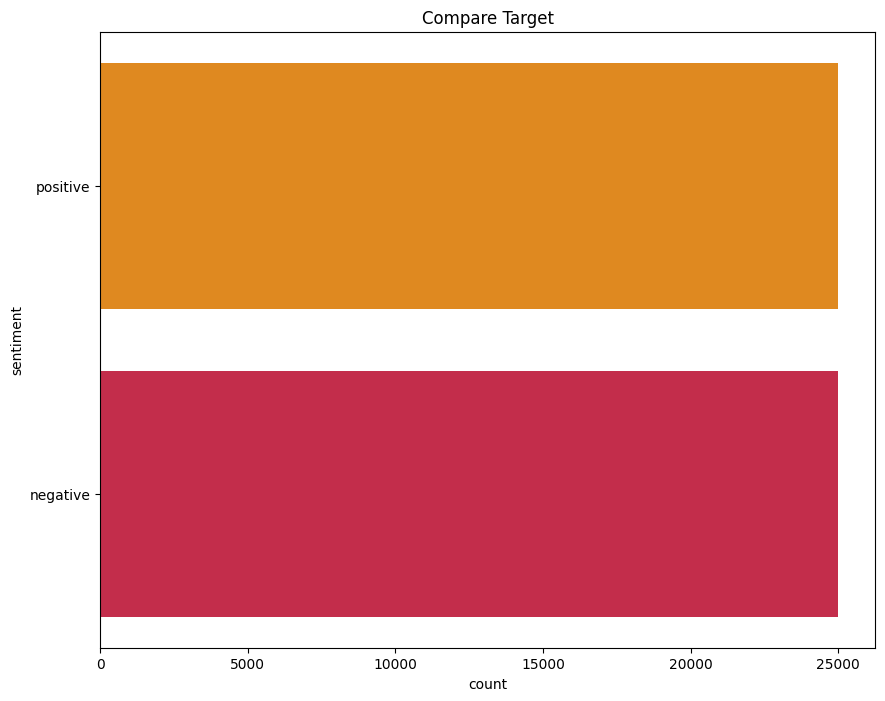

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, y="sentiment",palette=["darkorange","crimson"])
plt.title("Compare Target")
plt.show()

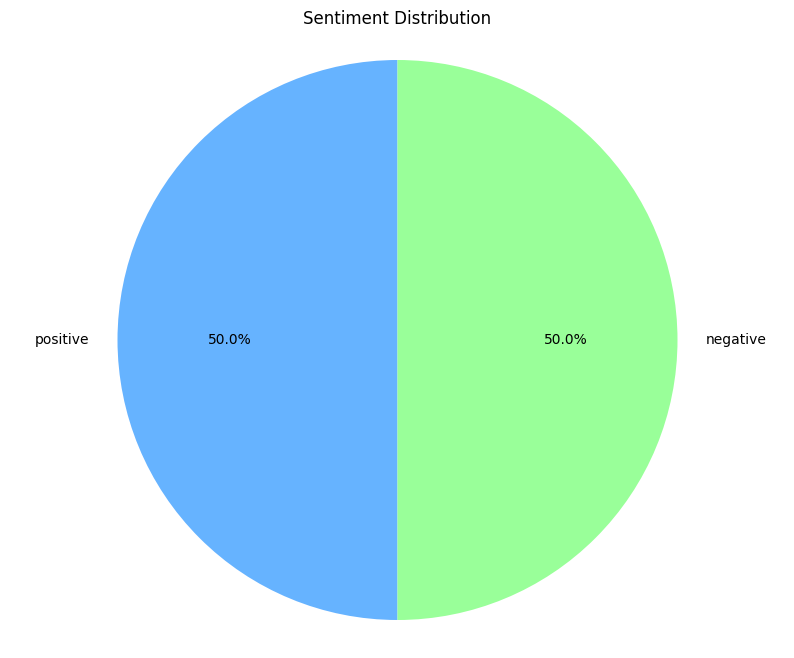

In [11]:
sentiment_counts = df["sentiment"].value_counts()

plt.figure(figsize=(10,8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.title('Sentiment Distribution')
plt.axis("equal")
plt.show()

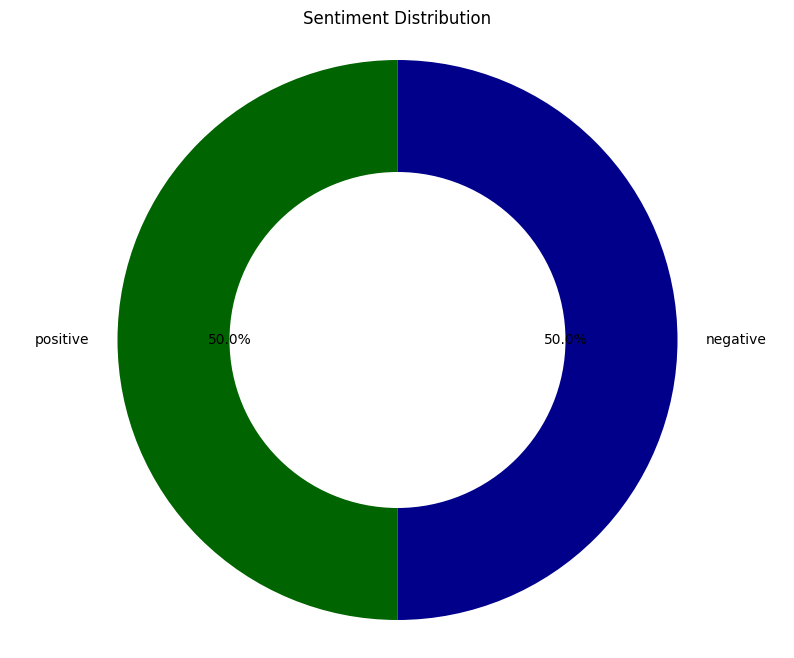

In [12]:
plt.figure(figsize=(10,8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['darkgreen','darkblue'], wedgeprops=dict(width=0.4))
plt.title('Sentiment Distribution')
plt.axis("equal")
plt.show()

In [13]:
df1=df.copy()

In [14]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string
from bs4 import BeautifulSoup

def clean_text(text):
    if isinstance(text, str):
        text = BeautifulSoup(text, 'html.parser').get_text()
        text = re.sub(r"[^a-zA-Z]", " ", text)
        text = text.translate(str.maketrans("", "", string.punctuation))

        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"
                                   u"\U0001F300-\U0001F5FF"
                                   u"\U0001F680-\U0001F6FF"
                                   u"\U0001F1E0-\U0001F1FF"
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   "]+", flags=re.UNICODE)
        text = emoji_pattern.sub(r'', text)

        text = re.sub(r"#.*", "", text)
        text = re.sub(r"/\*.*?\*/", "", text, flags=re.DOTALL)
        text = text.lower()

       
        nltk_stop_words = set(stopwords.words('english'))
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in nltk_stop_words]

        text = ' '.join(tokens)

        return text
    else:
        return ""

In [15]:
df["review"]=df["review"].apply(clean_text)

<ipython-input-14-5a427ec412a1>:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


# Negative Data Length

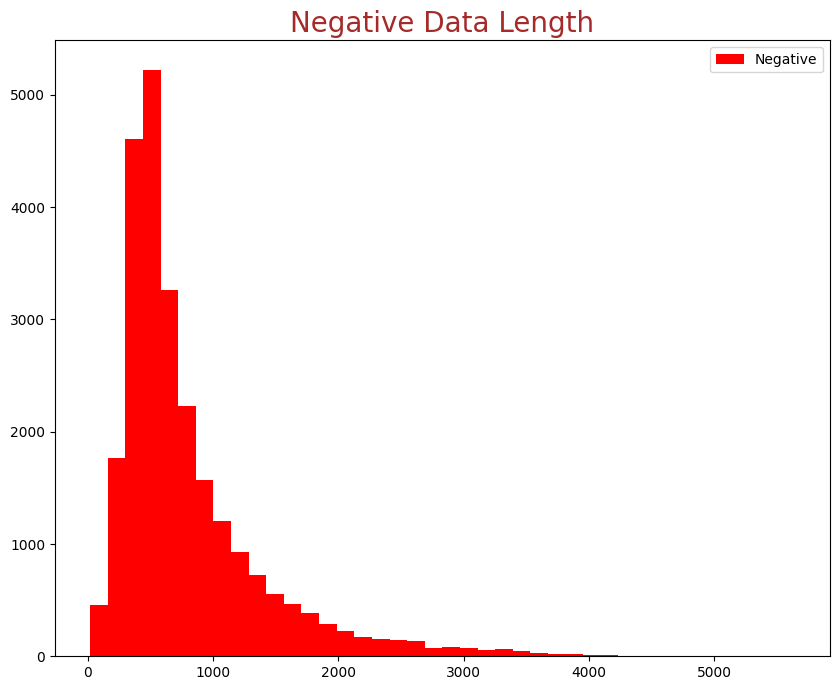

In [16]:
negative_len=df[df["sentiment"]=="negative"]["review"].str.len()

plt.figure(figsize=(10,8))
plt.hist(negative_len, bins=40,label='Negative',color="red")
plt.title("Negative Data Length",fontsize=20,color="brown")
plt.legend()
plt.show()

# Positive Data Length

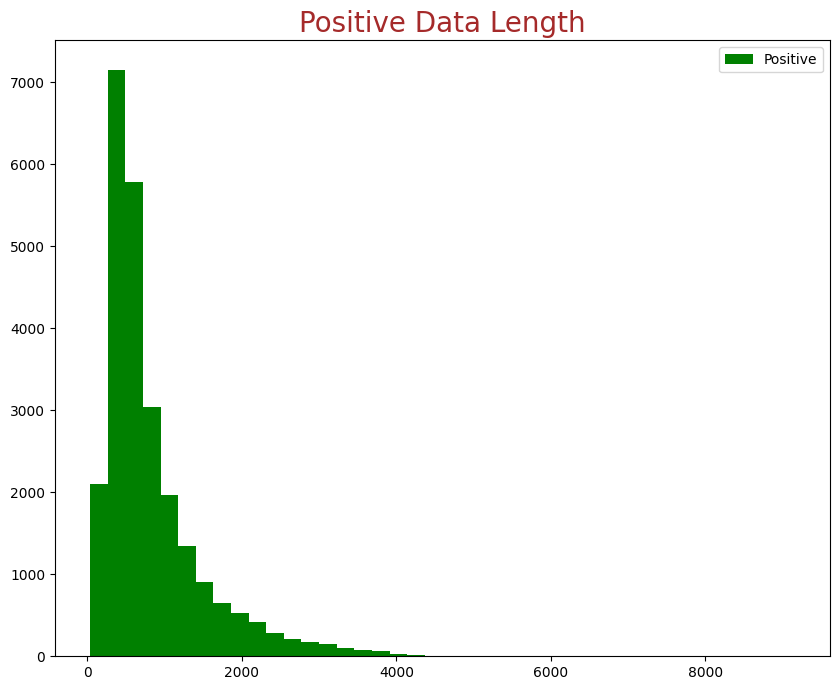

In [17]:
positive_len=df[df["sentiment"]=="positive"]["review"].str.len()

plt.figure(figsize=(10,8))
plt.hist(positive_len, bins=40,label='Positive',color="green")
plt.title("Positive Data Length",fontsize=20,color="brown")
plt.legend()
plt.show()

# Positive & negative Data Length

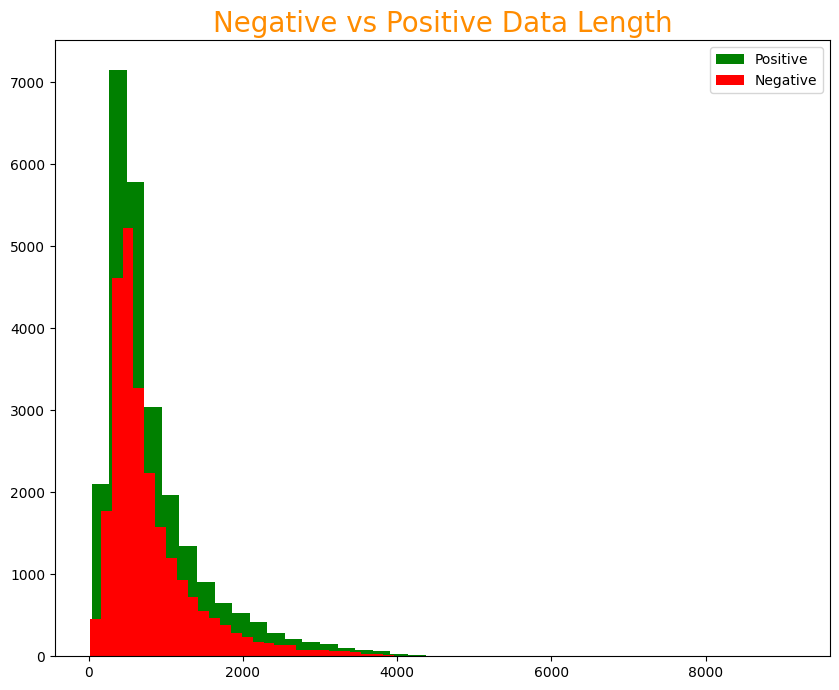

In [18]:
plt.figure(figsize=(10,8))
plt.hist(positive_len, bins=40,label='Positive',color="green")
plt.hist(negative_len, bins=40,label='Negative',color="red")
plt.title("Negative vs Positive Data Length",fontsize=20,color="darkorange")
plt.legend()
plt.show()

# ALL Data Wordcloud

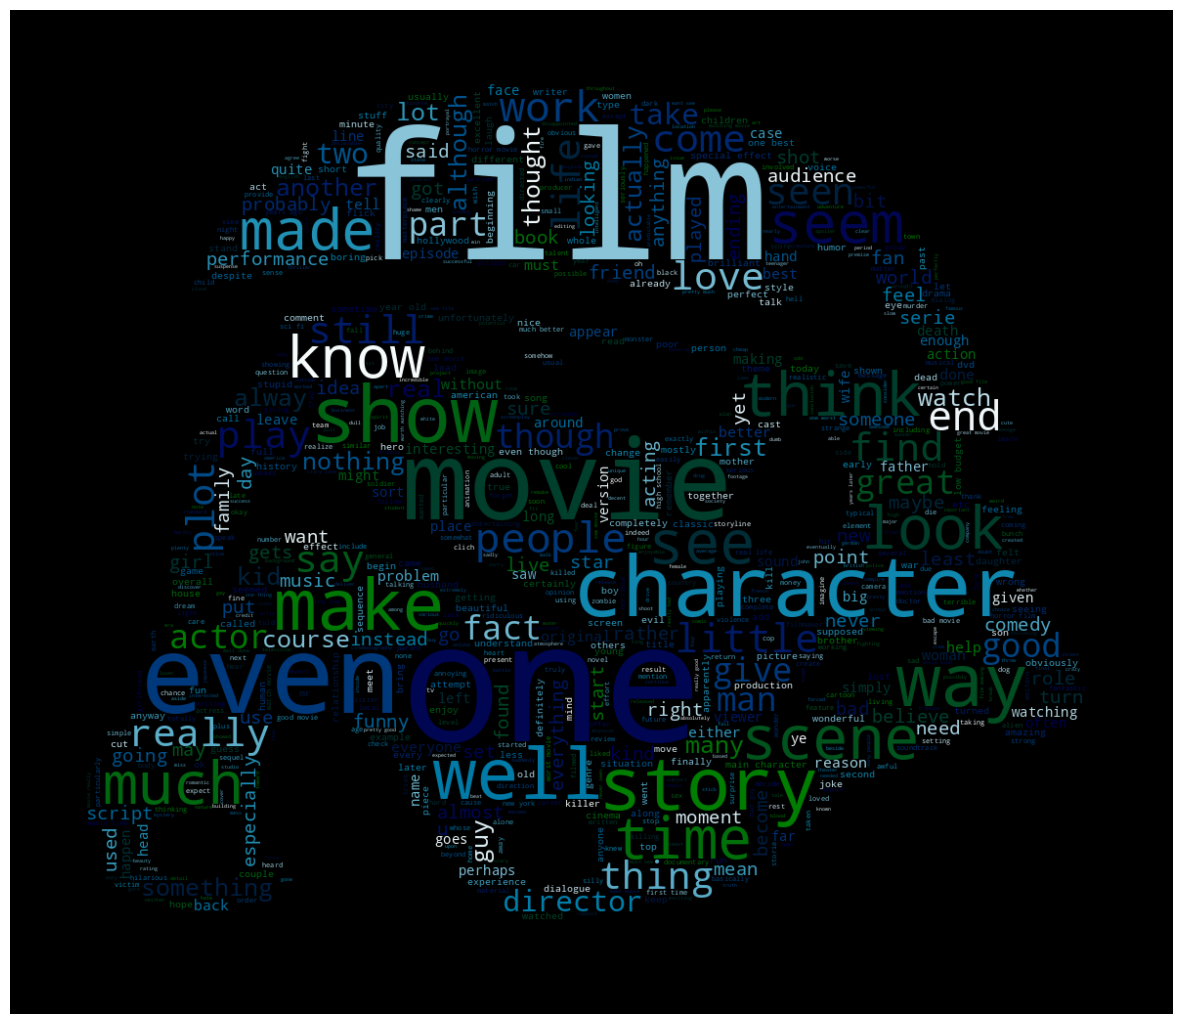

In [19]:
plt.figure(figsize=(15,15))
all_text=" ".join(df['review'].values.tolist())
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='black', max_words=800,colormap="ocean",mask=mask).generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Negative Data WordCloud

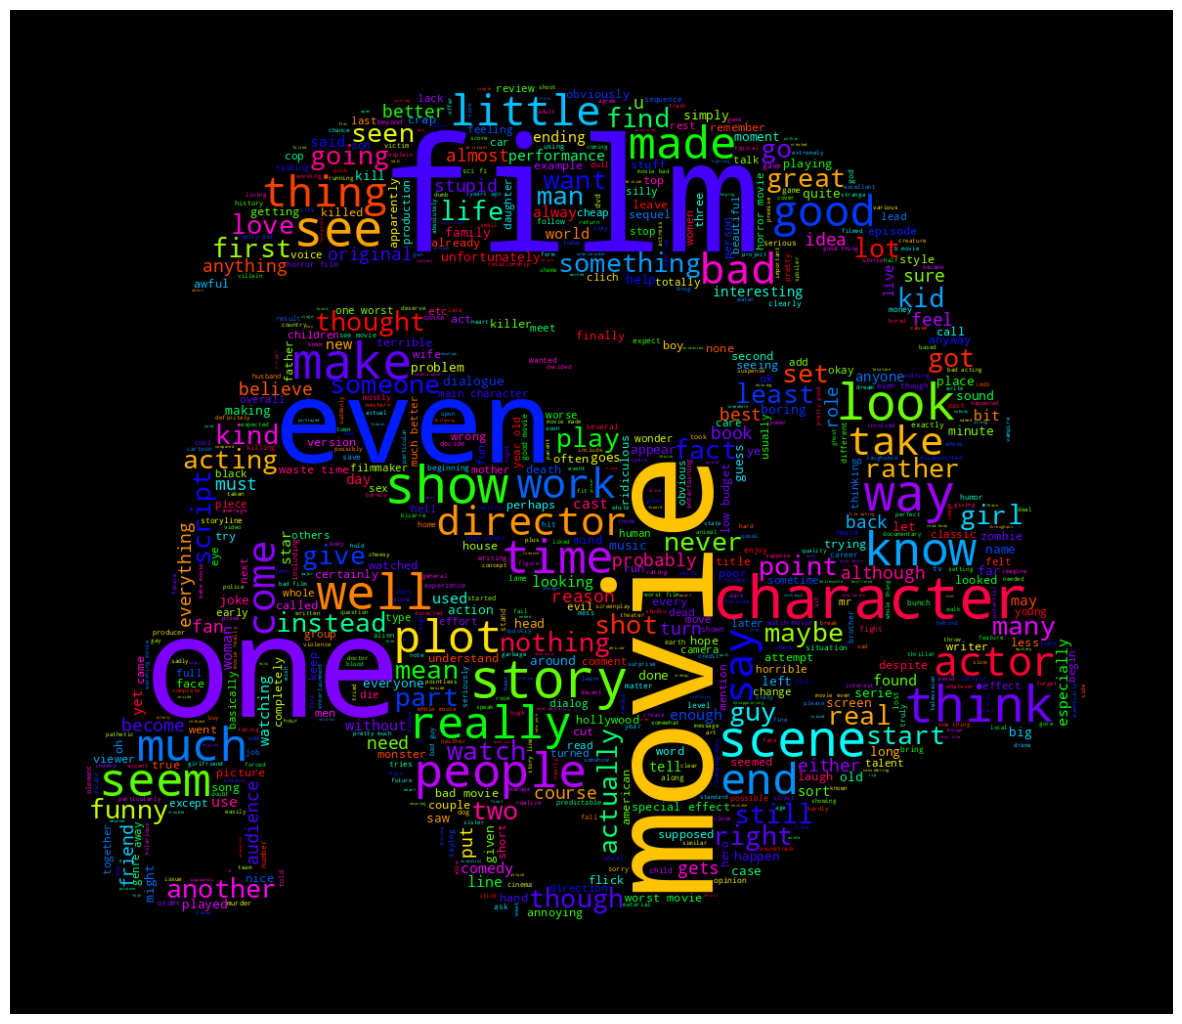

In [20]:
plt.figure(figsize=(15,15))
negative_wordcloud=df[df["sentiment"]=="negative"]
negative_text=" ".join(negative_wordcloud['review'].values.tolist())
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='black', max_words=800,colormap="hsv",mask=mask).generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Positive Data WordCloud

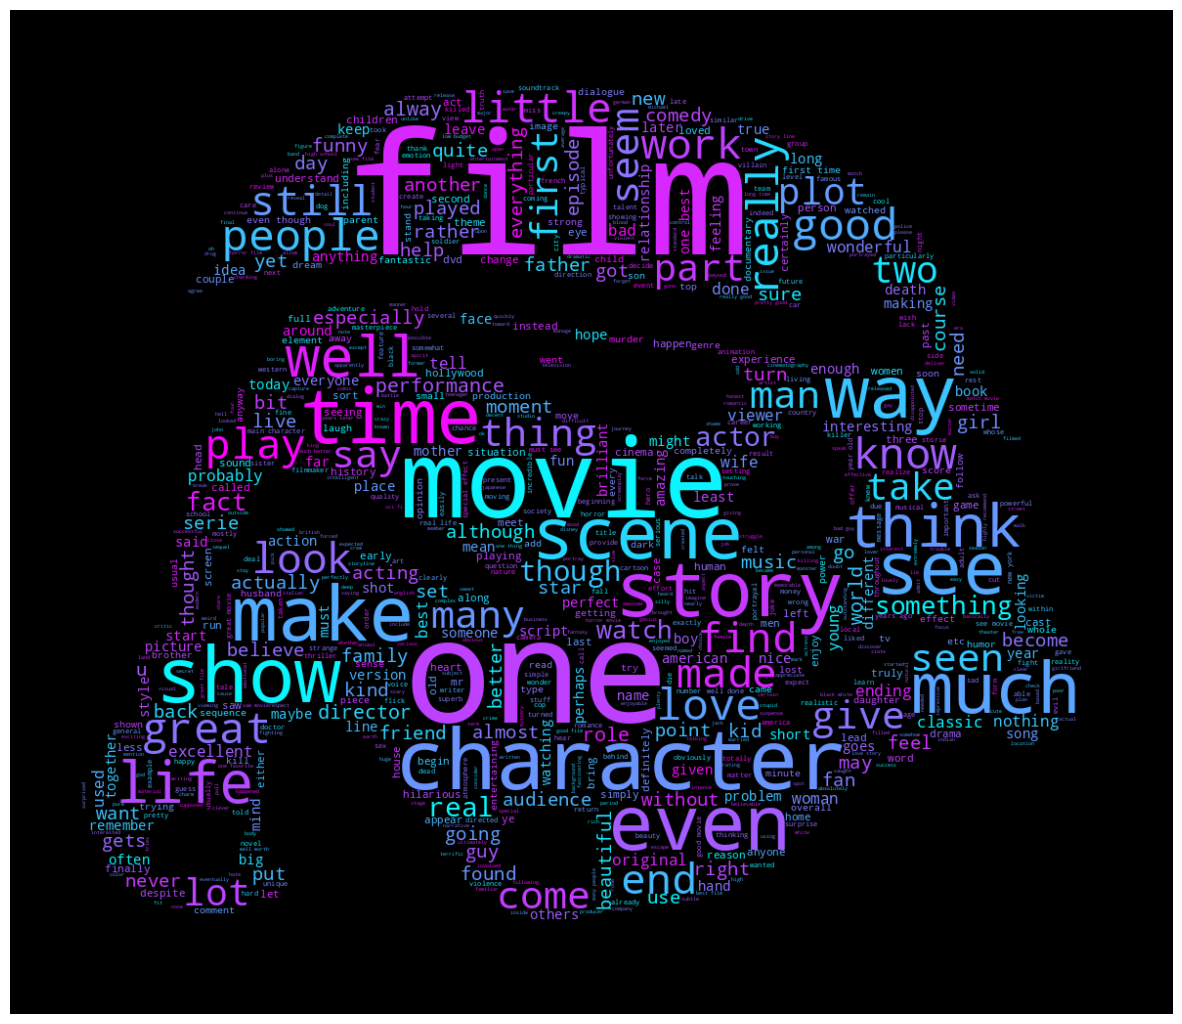

In [21]:
plt.figure(figsize=(15,15))
positive_wordcloud=df[df["sentiment"]=="positive"]
positive_text=" ".join(positive_wordcloud['review'].values.tolist())
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='black', max_words=800,colormap="cool",mask=mask).generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 30 Most common Words From All Text

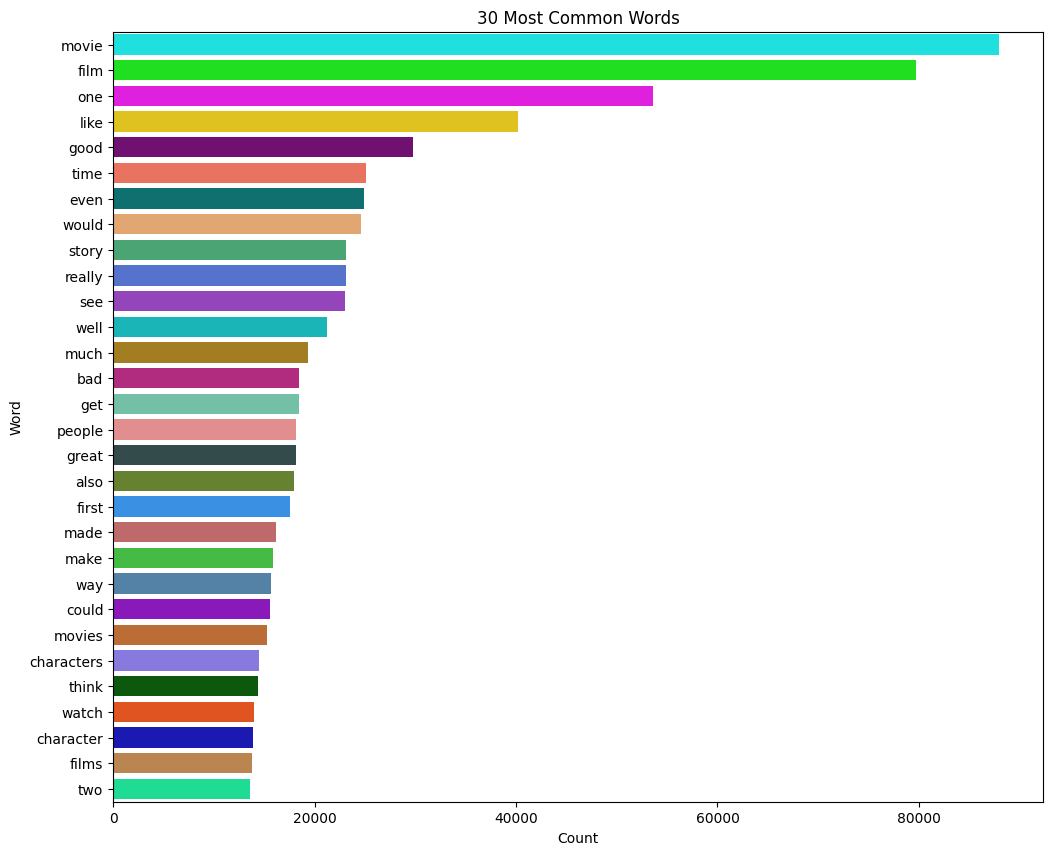

In [22]:
data_set =df["review"].str.split()
all_words = list(chain.from_iterable(data_set))
counter = Counter(all_words)
common_words = counter.most_common(30)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])

colors = ["cyan", "lime", "magenta", "gold", "purple", "tomato", "teal", "sandybrown", "mediumseagreen",
          "royalblue", "darkorchid", "darkturquoise", "darkgoldenrod", "mediumvioletred", "mediumaquamarine",
          "lightcoral", "darkslategray", "olivedrab", "dodgerblue", "indianred", "limegreen", "steelblue",
          "darkviolet", "chocolate", "mediumslateblue", "darkgreen", "orangered", "mediumblue", "peru", "mediumspringgreen"]

plt.figure(figsize=(12, 10))
sns.barplot(x='Count', y='Word', data=df_common_words, palette=colors)
plt.title('30 Most Common Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

# Most Common Words From Positive Text

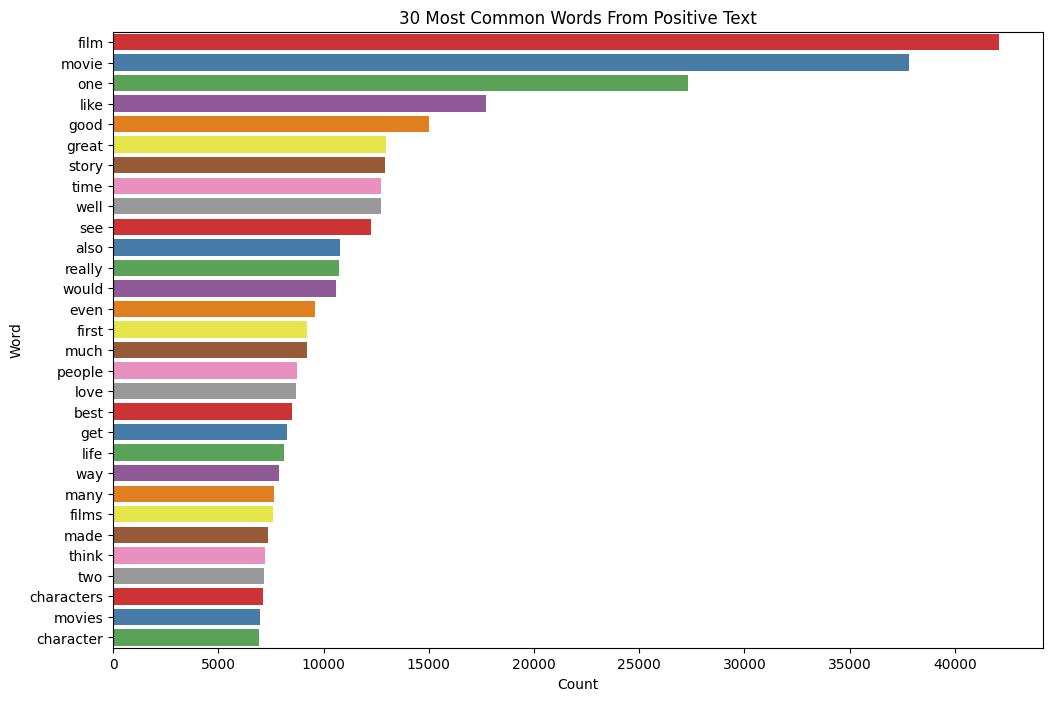

In [23]:
positive_text = df[df["sentiment"] == "positive"]
data_set = positive_text["review"].str.split()
all_words = [word for sublist in data_set for word in sublist]
counter = Counter(all_words)
common_words = counter.most_common(30)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=df_common_words,palette="Set1")
plt.title('30 Most Common Words From Positive Text')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

# 30 Most Common Words From Negative Text

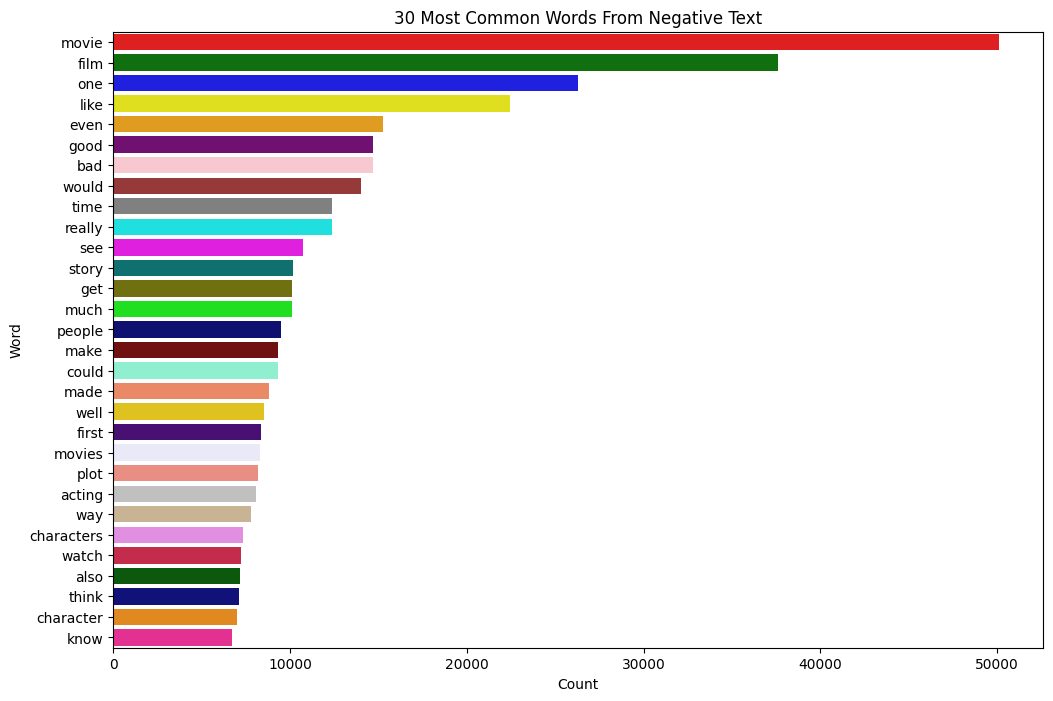

In [24]:
negative_text = df[df["sentiment"] == "negative"]
data_set = negative_text["review"].str.split()
all_words = [word for sublist in data_set for word in sublist]
counter = Counter(all_words)
common_words = counter.most_common(30)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])
plt.figure(figsize=(12, 8))
colors = ["red", "green", "blue", "yellow", "orange", "purple", "pink", "brown", "gray",
          "cyan", "magenta", "teal", "olive", "lime", "navy", "maroon", "aquamarine",
          "coral", "gold", "indigo", "lavender", "salmon", "silver", "tan", "violet",
          "crimson", "darkgreen", "darkblue", "darkorange", "deeppink"]
sns.barplot(x='Count', y='Word', data=df_common_words,palette=colors)
plt.title('30 Most Common Words From Negative Text')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

In [25]:
data_map={"positive":0,"negative":1} 
df["sentiment"]=df["sentiment"].map(data_map)
df.head()

,review,sentiment
0,one reviewers mentioned watching oz episode ho...,0
1,wonderful little production filming technique ...,0
2,thought wonderful way spend time hot summer we...,0
3,basically family little boy jake thinks zombie...,1
4,petter mattei love time money visually stunnin...,0


In [26]:
from transformers import AutoTokenizer, DebertaForSequenceClassification
import torch

deberta_tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-base")
deberta_model = DebertaForSequenceClassification.from_pretrained("microsoft/deberta-base",num_labels=2).to(device)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [27]:
text_data=df1["review"].tolist()
label_data=df1["sentiment"].tolist()

# Create Custom Dataset

In [28]:
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split


class CustomDataset(Dataset):
  def __init__(self, texts, labels, tokenizer, max_len=512):
    self.texts = texts
    self.labels = labels
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.texts)

  def __getitem__(self, idx):
    text = str(self.texts[idx])
    label = torch.tensor(self.labels[idx])

    encoding = self.tokenizer(text, truncation=True, padding="max_length",
                              max_length=self.max_len)

    return {
        'input_ids': encoding['input_ids'],
        'attention_mask': encoding['attention_mask'],
        'labels': label
    }

    

In [29]:
text_data=df["review"].tolist()
label_data=df["sentiment"].tolist()


In [30]:
texts_train, texts_temp, labels_train, labels_temp = train_test_split(text_data, label_data, test_size=0.2, random_state=42)
texts_val, texts_test, labels_val, labels_test = train_test_split(
    texts_temp, labels_temp, test_size=0.5, random_state=42
)

In [31]:
train_data = CustomDataset(texts_train, labels_train, deberta_tokenizer)
val_data = CustomDataset(texts_val, labels_val, deberta_tokenizer)
test_data = CustomDataset(texts_test, labels_test, deberta_tokenizer)

In [32]:
print(f"Train Size: {len(train_data)}")
print(f"Validation Size: {len(val_data)}")
print(f"Test Size: {len(test_data)}")

Train Size: 40000
Validation Size: 5000
Test Size: 5000


In [33]:
from sklearn.metrics import accuracy_score, f1_score
def compute_metrics(example):
  labels = example.label_ids
  preds = example.predictions.argmax(-1)

  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)

  return {'accuracy': acc, "f1": f1}

In [34]:
from transformers import Trainer, TrainingArguments
batch_size = 4


args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    learning_rate=2e-5,
    num_train_epochs=1,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=2,
    load_best_model_at_end=True,
    seed=42,
    disable_tqdm=False
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [35]:
trainer = Trainer(model=deberta_model,
                  args=args,
                  train_dataset = train_data,
                  eval_dataset = val_data,
                  compute_metrics=compute_metrics,
                  tokenizer = deberta_tokenizer)

In [36]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.342100,0.359369,0.911200,0.911199


TrainOutput(global_step=10000, training_loss=0.40987560272216794, metrics={'train_runtime': 4021.3164, 'train_samples_per_second': 9.947, 'train_steps_per_second': 2.487, 'total_flos': 1.226390396928e+16, 'train_loss': 0.40987560272216794, 'epoch': 1.0})

In [37]:
trainer.save_model("deberta_model for Sentiment Analysis")

In [38]:
deberta_tokenizer.save_pretrained("deberta_model for Sentiment Analysis")

('deberta_model for Sentiment Analysis/tokenizer_config.json',
 'deberta_model for Sentiment Analysis/special_tokens_map.json',
 'deberta_model for Sentiment Analysis/vocab.json',
 'deberta_model for Sentiment Analysis/merges.txt',
 'deberta_model for Sentiment Analysis/added_tokens.json',
 'deberta_model for Sentiment Analysis/tokenizer.json')

In [39]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
model = AutoModelForSequenceClassification.from_pretrained("deberta_model for Sentiment Analysis")
tokenizer = AutoTokenizer.from_pretrained("deberta_model for Sentiment Analysis")

#  Extract true labels from the datasets


In [40]:
def extract_labels(dataset):
    return [item['labels'].item() for item in dataset]

In [41]:
true_test_labels = extract_labels(test_data)

In [42]:
preds_outputs = trainer.predict(test_data)
preds_outputs.metrics

{'test_loss': 0.3445325791835785,
 'test_accuracy': 0.9164,
 'test_f1': 0.9164022074246215,
 'test_runtime': 155.5126,
 'test_samples_per_second': 32.152,
 'test_steps_per_second': 8.038}

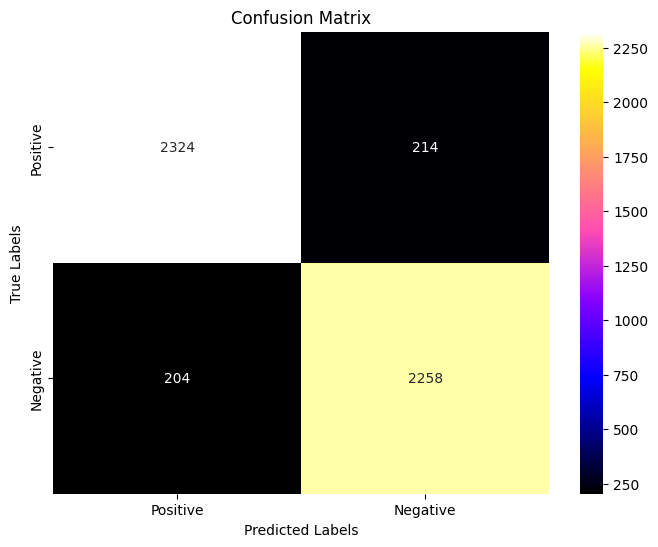

In [43]:
y_preds = np.argmax(preds_outputs.predictions, axis=1)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
label_name=["Positive","Negative"]
cm = confusion_matrix(true_test_labels, y_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='gnuplot2', xticklabels=label_name, yticklabels=label_name)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [44]:
report = classification_report(true_test_labels,y_preds, target_names=label_name)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    Positive       0.92      0.92      0.92      2538
    Negative       0.91      0.92      0.92      2462

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000



In [45]:
# Accuracy
print("##################################################################################")
accuracy = accuracy_score(true_test_labels,y_preds)
print("Accuracy:", accuracy)
print("##################################################################################")
# Precision
print("##################################################################################")
precision = precision_score(true_test_labels,y_preds, average='weighted')
print("Precision:", precision)
print("##################################################################################")
recall = recall_score(true_test_labels,y_preds, average='weighted')
print("Recall:", recall)
print("##################################################################################")
# F1 Score
f1 = f1_score(true_test_labels,y_preds, average='weighted')
print("F1 Score:", f1)
print("##################################################################################")

##################################################################################
Accuracy: 0.9164
##################################################################################
##################################################################################
Precision: 0.9164117467535129
##################################################################################
Recall: 0.9164
##################################################################################
F1 Score: 0.9164022074246215
##################################################################################


# Roc Curve

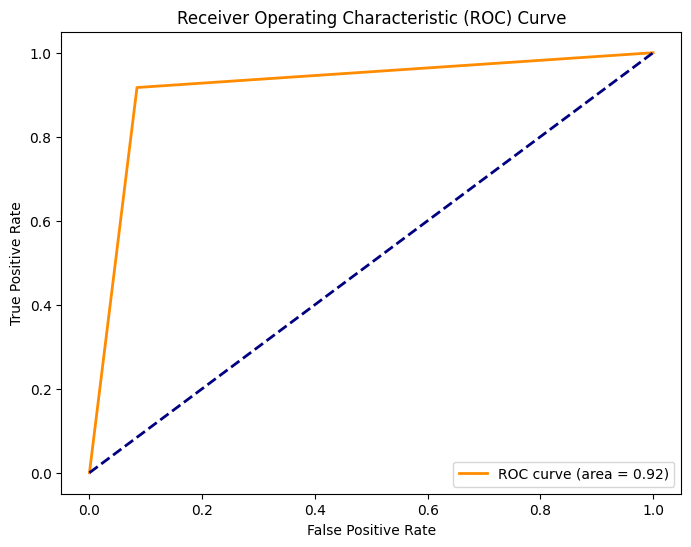

In [46]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(true_test_labels, y_preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


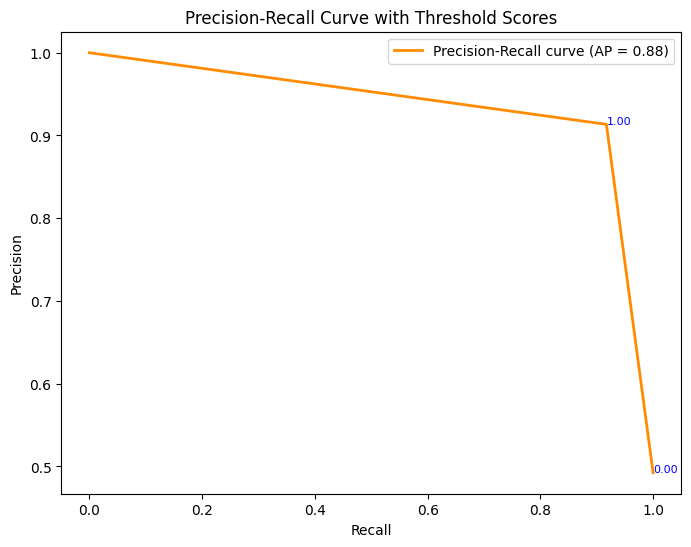

In [47]:
from sklearn.metrics import precision_recall_curve, average_precision_score


precision, recall, thresholds = precision_recall_curve(true_test_labels, y_preds)
avg_precision = average_precision_score(true_test_labels, y_preds)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'Precision-Recall curve (AP = {avg_precision:.2f})')

for i in range(0, len(thresholds), max(1, len(thresholds)//10)):
    plt.text(recall[i], precision[i], f'{thresholds[i]:.2f}', fontsize=8, color='blue')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with Threshold Scores')
plt.legend(loc='best')
plt.show()


# Roc Auc Score

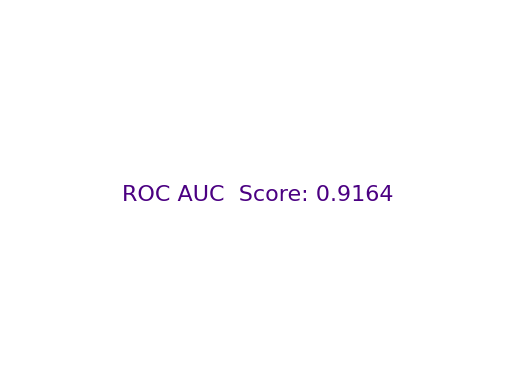

In [48]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(true_test_labels,y_preds,multi_class="ovr")
plt.plot([])
plt.text(0,0, f'ROC AUC  Score: {roc_auc:.4f}', fontsize=16, ha='center', va='center',color="indigo")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()

# Log Loss

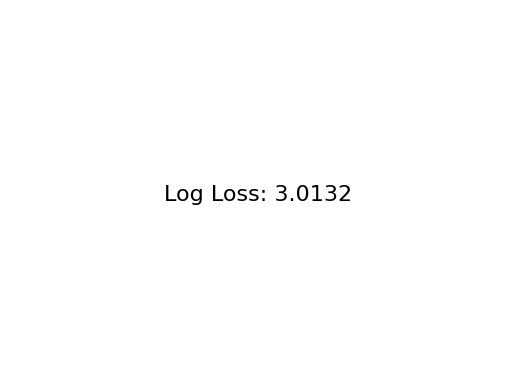

In [49]:
from sklearn.metrics import log_loss
logarithm_loss=log_loss(true_test_labels,y_preds)
plt.plot([])
plt.text(0,0, f'Log Loss: {logarithm_loss:.4f}', fontsize=16, ha='center', va='center',color="black")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()

# Cohen Kappa Score

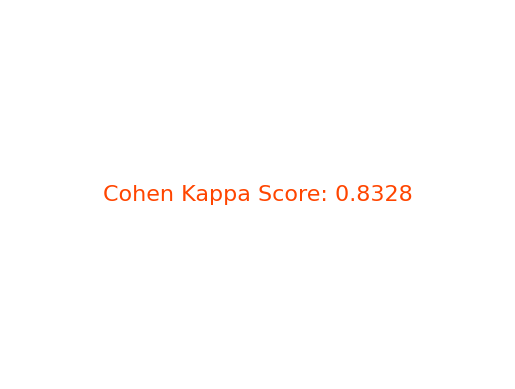

In [50]:
from sklearn.metrics import cohen_kappa_score,matthews_corrcoef
kappa = cohen_kappa_score(true_test_labels,y_preds)
plt.plot([])
plt.text(0,0, f'Cohen Kappa Score: {kappa:.4f}', fontsize=16, ha='center', va='center',color="orangered")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()

# Matthews Correlation Coefficient

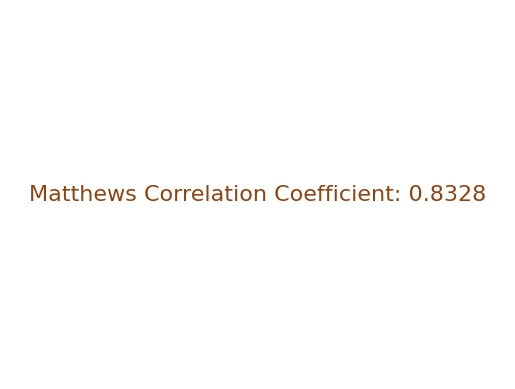

In [51]:
mcc = matthews_corrcoef(true_test_labels,y_preds)


plt.plot([])
plt.text(0,0, f'Matthews Correlation Coefficient: {mcc:.4f}', fontsize=16, ha='center', va='center',color="saddlebrown")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()

# Custom Data Prediction

In [52]:
def get_prediction(text):
  input_ids = tokenizer.encode(text, return_tensors='pt')
  output = model(input_ids)

  preds = torch.nn.functional.softmax(output.logits, dim=-1)

  prob = torch.max(preds).item()

  idx = torch.argmax(preds).item()
  sentiment = label_name[idx]

  return {'sentiment':sentiment, 'prob':prob}

In [53]:
text="Unfortunately, the operation has failed due to unforeseen circumstances. Despite our best efforts, an error occurred during the process. We understand this may be frustrating and sincerely apologize for any inconvenience caused. Please try again later or contact support if the issue persists."
get_prediction(text)

{'sentiment': 'Positive', 'prob': 0.982913076877594}

In [54]:
text="Great job! The operation was successful, and everything is running smoothly. Thank you for your patience and persistence. We appreciate your effort and look forward to continuing this positive momentum. Keep up the excellent work!"
get_prediction(text)

{'sentiment': 'Positive', 'prob': 0.9979879856109619}